In [1]:
import pyGPs
import numpy as np

In [5]:
demoData = np.load('regression_data.npz')
x = demoData['x']
y = demoData['y']
z = demoData['xstar']

In [10]:
len(x), len(y), len(z)

(20, 20, 113)

Number of line searches 14


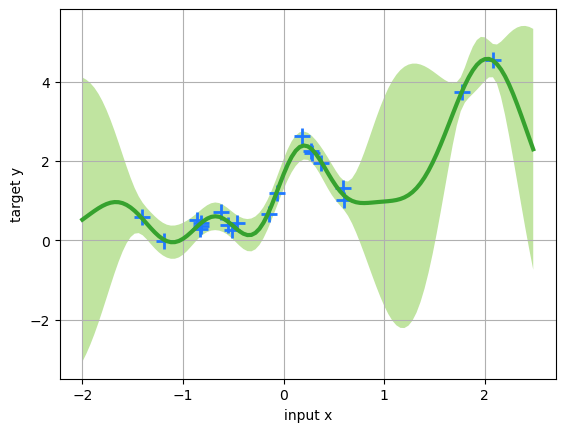

In [11]:
model = pyGPs.GPR()  # 高斯过程回归模型
model.getPosterior(x ,y)  # 拟合默认模型(零均值和rbf核)
model.optimize(x,y)       # 优化超参数
model.predict(z)          # 对测试数据进行预测
model.plot()

In [14]:
m = pyGPs.mean.Linear(D = x.shape[1]) + pyGPs.mean.Const()
k = pyGPs.cov.RBF()
model.setPrior(mean=m, kernel=k)

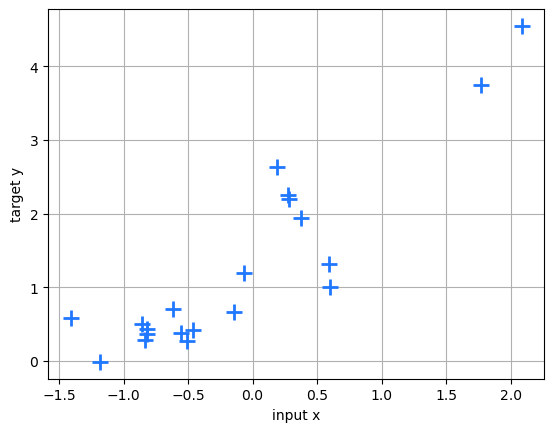

In [15]:
model.plotData_1d()

In [16]:
model.setOptimizer("Minimize", num_restarts=30)

In [17]:
model.optimize()

Number of line searches 25
Number of line searches 23
Number of line searches 24
Number of line searches 37
Number of line searches 40
Number of line searches 40
Number of line searches 21
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 20
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 35
Number of line searches 18
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 40
Number of line searches 31
Number of line searches 24
Number of line searches 28
Number of line searches 40
Number of line searches 34
Number of line searches 40
Number of line searches 40
Number of line searches 32
Number of line searches 27
[Minimize] 0 out of 30 trails failed during optimization


In [18]:
ym, ys2, fm, fs2, lp = model.predict(z)

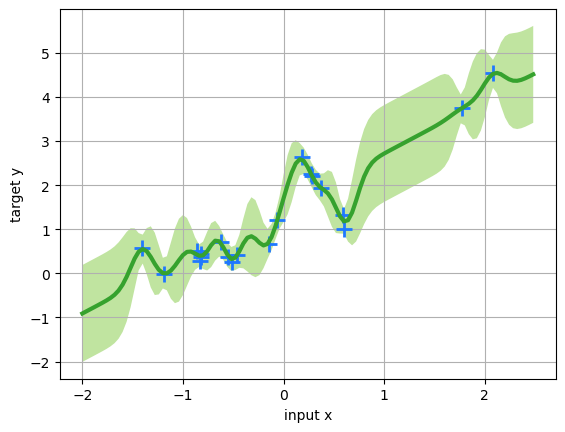

In [20]:
model.plot()